In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('airline_tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Exploratory Data Analysis:

<Axes: xlabel='airline_sentiment', ylabel='count'>

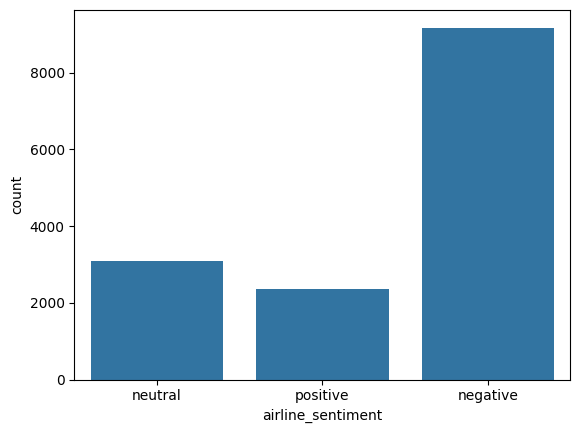

In [4]:
sns.countplot(data = df, x = 'airline_sentiment')

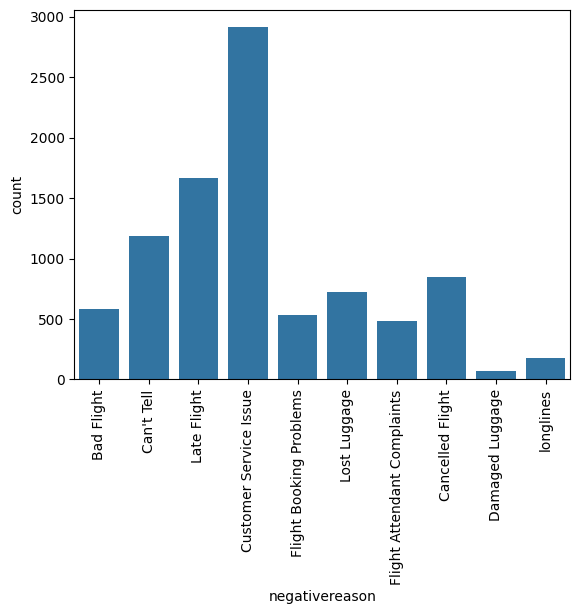

In [7]:
sns.countplot(data = df, x = 'negativereason')
plt.xticks(rotation = 90);

<Axes: xlabel='airline', ylabel='count'>

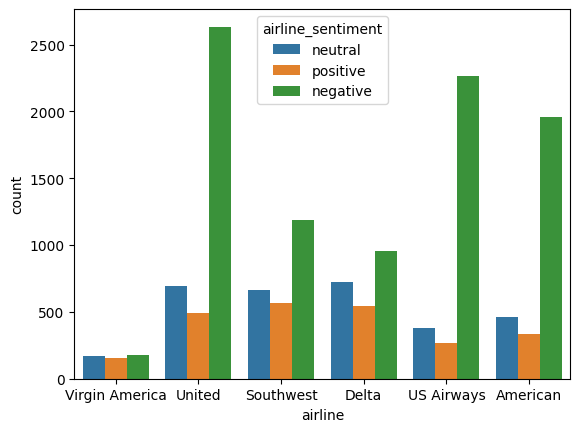

In [8]:
sns.countplot(data = df, x = 'airline', hue = 'airline_sentiment')

Data Preparation:

In [9]:
data = df[['airline_sentiment', 'text']]

In [10]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [11]:
X = data['text']

In [12]:
y = data['airline_sentiment']

In [13]:
from sklearn.model_selection import train_test_split
#You perform the train_test_split before the text handling to avoid another form of data leakage

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

Text Vectorization:

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf = TfidfVectorizer(stop_words = 'english')

In [ ]:
tfidf.fit(X_train) #In a similar vein to scaling, vectorizer fitting only occurs on X_train

TfidfVectorizer(stop_words='english')

In [18]:
X_train_tfidf = tfidf.transform(X_train)

In [19]:
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
X_train_tfidf #It's not recommended to attempt to transform thest with todense(), as these are much larger matricies

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 107073 stored elements and shape (11712, 12971)>

Creating Naive Bayes Models:

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

Creating Other Classification Models:

In [23]:
from sklearn.linear_model import LogisticRegression

In [26]:
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [27]:
from sklearn.svm import SVC, LinearSVC

In [28]:
rbf_svc = SVC()
rbf_svc.fit(X_train_tfidf, y_train)

SVC()

In [29]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf, y_train)

LinearSVC()

Evaluating The Models:

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [31]:
#When dealing with many models, it's often advised to create a reporting function that automates the reporting process so you don't have t type out each reporting metric for every model
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test, preds))
    ConfusionMatrixDisplay.from_estimator(model, X_test_tfidf, y_test)

              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



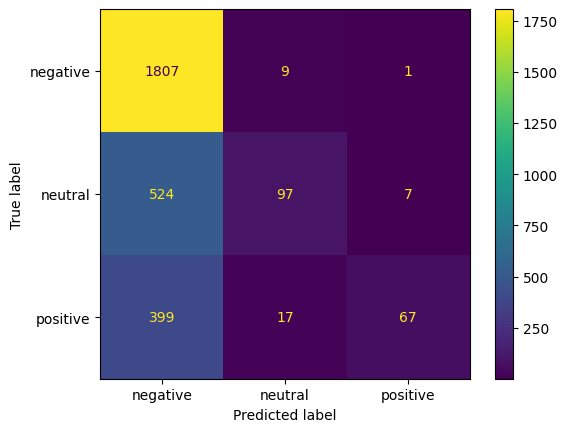

In [ ]:
report(nb) #The focus is on the negative reviews, and you'll notice that the Naive Bayes performs pretty well at labeling actual negative tweets
#Note that it reports a few non-negative tweets as negative, but better safe than sorry

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.81      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



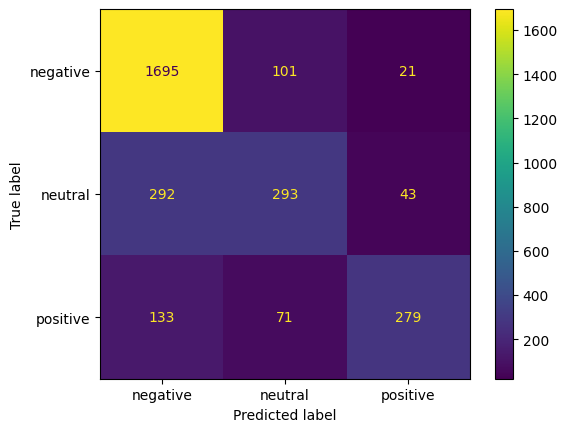

In [ ]:
report(log_model) #Not as many actual negative tweets are being caught, but more of the neutral and positive tweets are being correctly labeled

              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      1817
     neutral       0.67      0.41      0.51       628
    positive       0.81      0.56      0.66       483

    accuracy                           0.77      2928
   macro avg       0.75      0.64      0.67      2928
weighted avg       0.76      0.77      0.75      2928



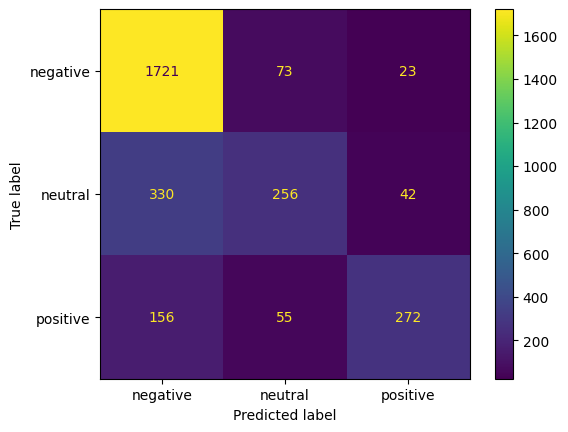

In [ ]:
report(rbf_svc) #Similar performance to logistic regression

              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



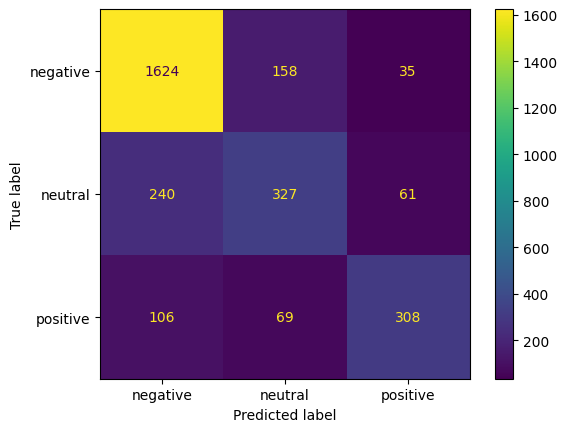

In [ ]:
report(linear_svc) #Also similar performance to logistic regression

Deploying A Model With A Pipeline:

In [38]:
from sklearn.pipeline import Pipeline

In [43]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [44]:
pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [45]:
X #Remember that X is the raw strings, but the pipeline performs tfidf vectorization before training the model

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [46]:
pipe.predict(['good flight'])

array(['positive'], dtype=object)

In [47]:
pipe.predict(['bad flight'])

array(['negative'], dtype=object)

In [48]:
pipe.predict(['ok flight'])

array(['neutral'], dtype=object)